# Constraint Diagram

Auto-generated from `input_h3000_M0.35_R1000km_PL1000kg.ini` by `app/main.py`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ADRpy import unitconversions as co
from ADRpy import constraintanalysis as ca
from ADRpy import atmospheres as at

designbrief = {'rwyelevation_m': 0.0,
 'groundrun_m': 900.0,
 'stloadfactor': 1.5,
 'turnalt_m': 3000.0,
 'turnspeed_ktas': 160.0,
 'climbalt_m': 0.0,
 'climbspeed_kias': 140.0,
 'climbrate_fpm': 1200.0,
 'cruisealt_m': 3000.0,
 'cruisespeed_ktas': 224.0,
 'cruisethrustfact': 1.0,
 'servceil_m': 6000.0,
 'secclimbspd_kias': 110.0,
 'vstallclean_kcas': 100.0}
designatm = at.Atmosphere()
TOW_kg = 5569.567

designdefinition = {'aspectratio': 9.0,
 'sweep_le_deg': 2.0,
 'sweep_mt_deg': 0.0,
 'weightfractions': {'turn': 1.0, 'climb': 1.0, 'cruise': 1.0, 'servceil': 1.0},
 'weight_n': co.kg2n(TOW_kg)}

designperformance = {'CDTO': 0.0414,
 'CLTO': 1.2,
 'CLmaxTO': 1.85,
 'CLmaxclean': 1.45,
 'mu_R': 0.02,
 'CDminclean': 0.0254,
 'etaprop': {'take-off': 0.7,
             'climb': 0.8,
             'cruise': 0.85,
             'turn': 0.85,
             'servceil': 0.8}}

designpropulsion = 'electric'

concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm, designpropulsion)


## Quick Constraint Diagram Plots


In [2]:
ws_min_pa = 1900.000
ws_max_pa = 2600.000
ws_step_pa = 50.000

ws_step_plot_pa = max(ws_step_pa / 10.0, 1.0)
wslist_pa = np.arange(ws_min_pa, ws_max_pa + 0.5 * ws_step_plot_pa, ws_step_plot_pa)
if wslist_pa.size < 2:
    wslist_pa = np.array([ws_min_pa, ws_max_pa], dtype=float)



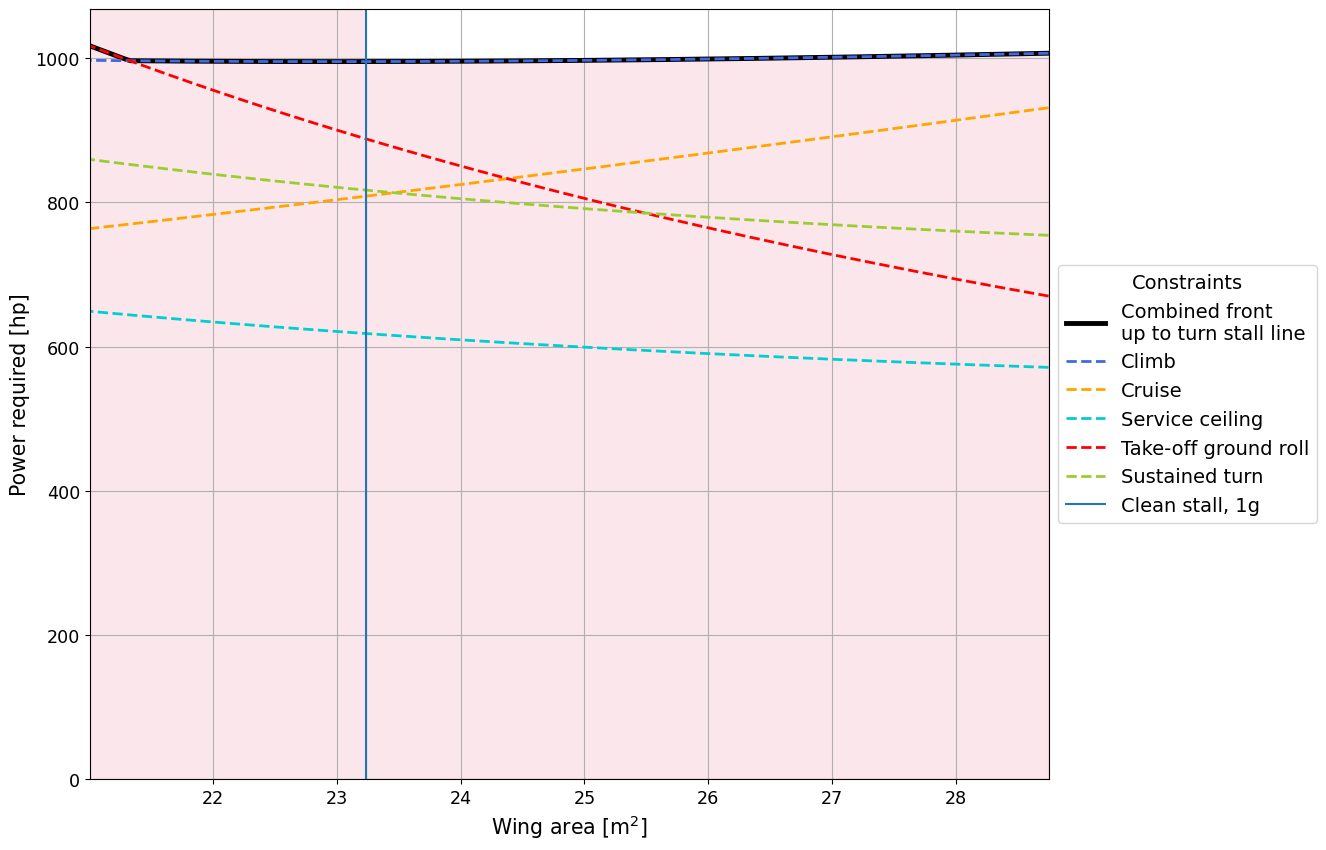

In [3]:
_ = concept.propulsionsensitivity_monothetic(
    wingloading_pa=wslist_pa,
    show='combined',
    y_var='p_hp',
    x_var='s_m2',
)


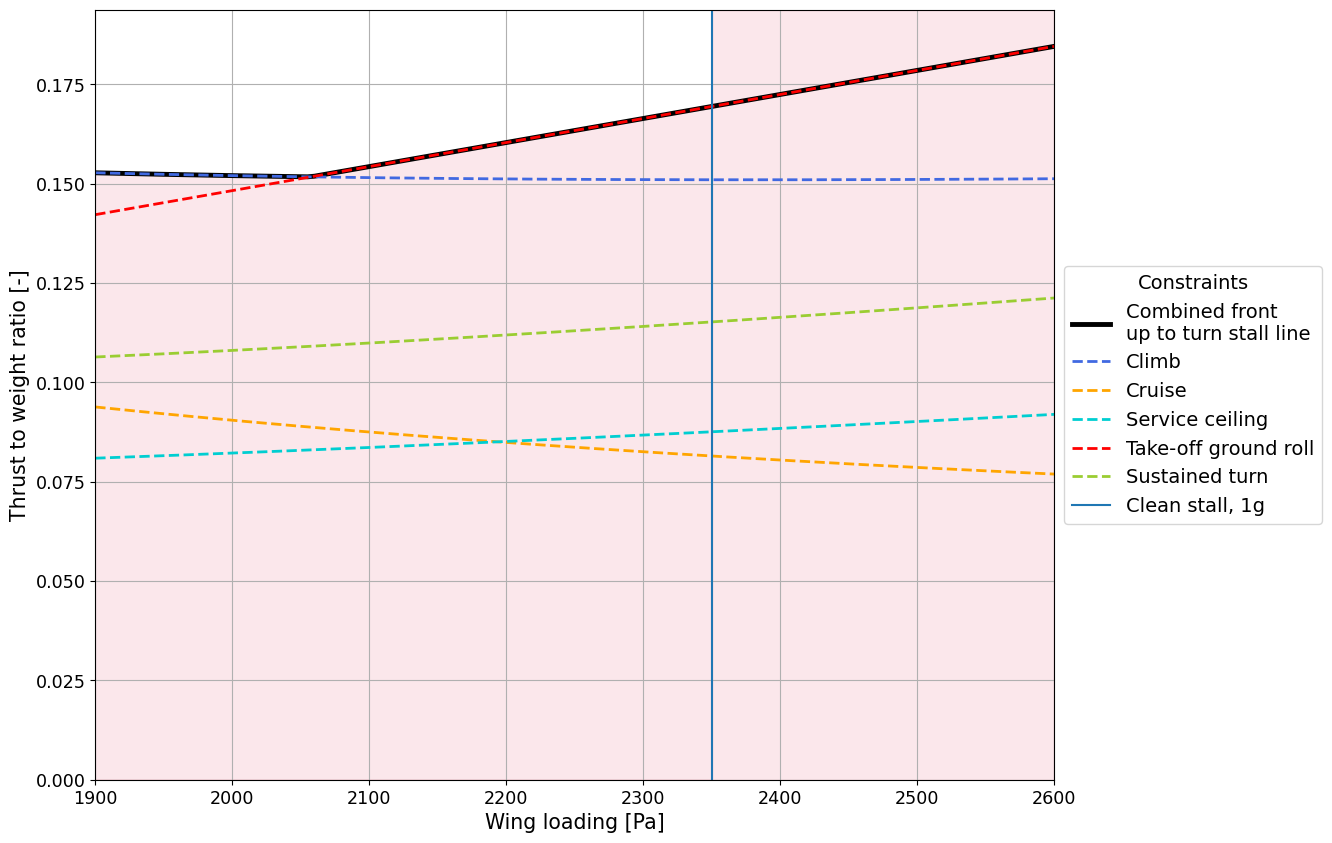

In [4]:
_ = concept.propulsionsensitivity_monothetic(
    wingloading_pa=wslist_pa,
    show='combined',
    y_var='tw',
    x_var='ws_pa',
)


## Flexible Constraint Plot


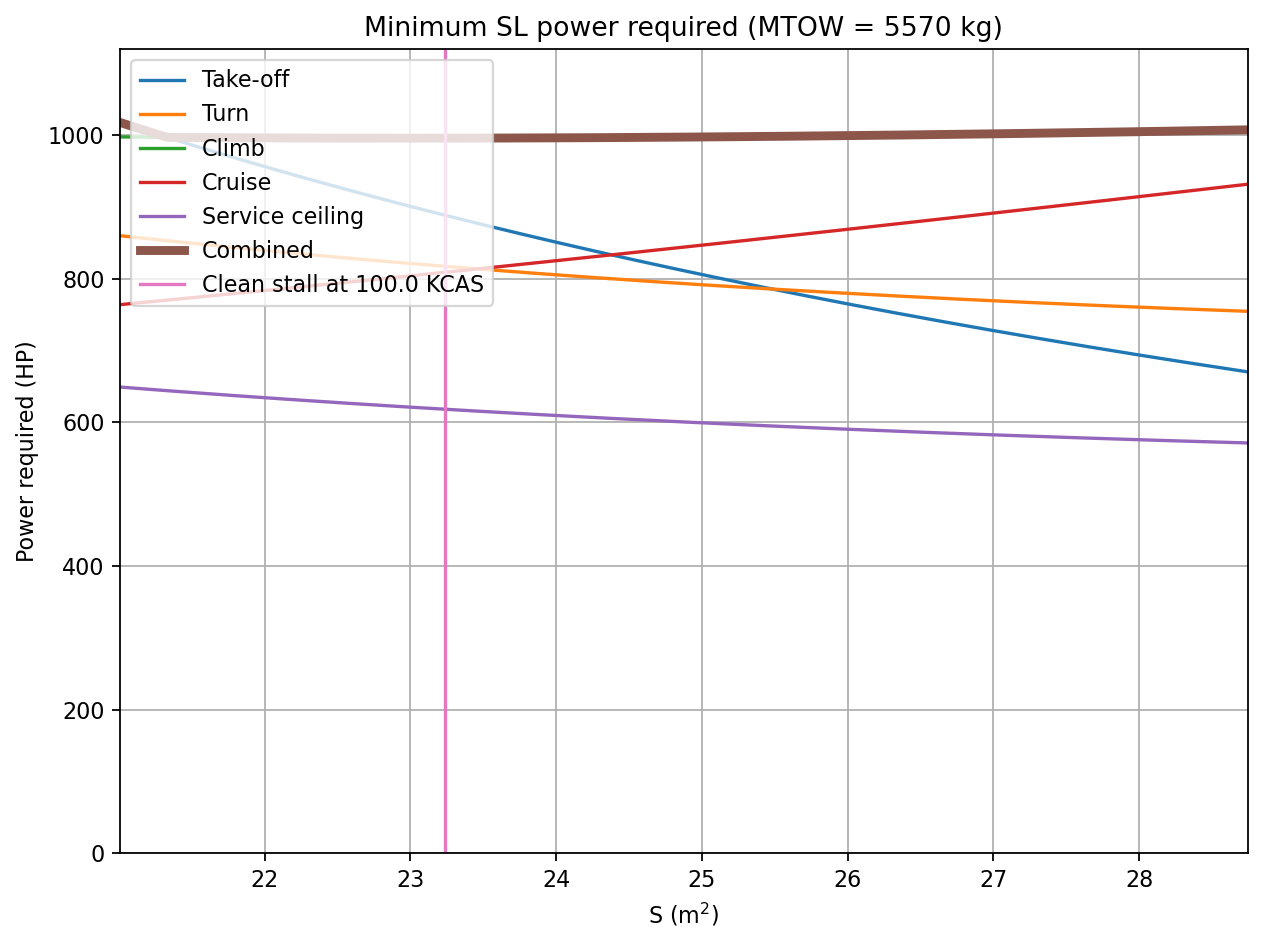

In [5]:
preq = concept.powerrequired(wslist_pa, tow_kg=TOW_kg, feasibleonly=False, map2sl=True)
Smin_m2 = concept.smincleanstall_m2(TOW_kg)
wingarea_m2 = co.kg2n(TOW_kg) / wslist_pa

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 160
plt.plot(wingarea_m2, preq['take-off'], label='Take-off')
plt.plot(wingarea_m2, preq['turn'], label='Turn')
plt.plot(wingarea_m2, preq['climb'], label='Climb')
plt.plot(wingarea_m2, preq['cruise'], label='Cruise')
plt.plot(wingarea_m2, preq['servceil'], label='Service ceiling')
combplot = plt.plot(wingarea_m2, preq['combined'], label='Combined')
plt.setp(combplot, linewidth=4)
y_max = float(np.nanmax(preq['combined']) * 1.1)
stall_label = f"Clean stall at {designbrief['vstallclean_kcas']} KCAS"
plt.plot([Smin_m2, Smin_m2], [0, y_max], label=stall_label)
plt.legend(loc='upper left')
plt.ylabel('Power required (HP)')
plt.xlabel('S (m$^2$)')
plt.title(f"Minimum SL power required (MTOW = {round(TOW_kg)} kg)")
plt.xlim(min(wingarea_m2), max(wingarea_m2))
plt.ylim(0, y_max)
plt.grid(True)
plt.tight_layout()
plt.savefig('Constraint_Diagram.png', dpi=200)
plt.show()


## Sensitivity Plots

This section mirrors the sensitivity plotting workflow from `constraint_example.ipynb` using +/-5% ranges around this INI case values.


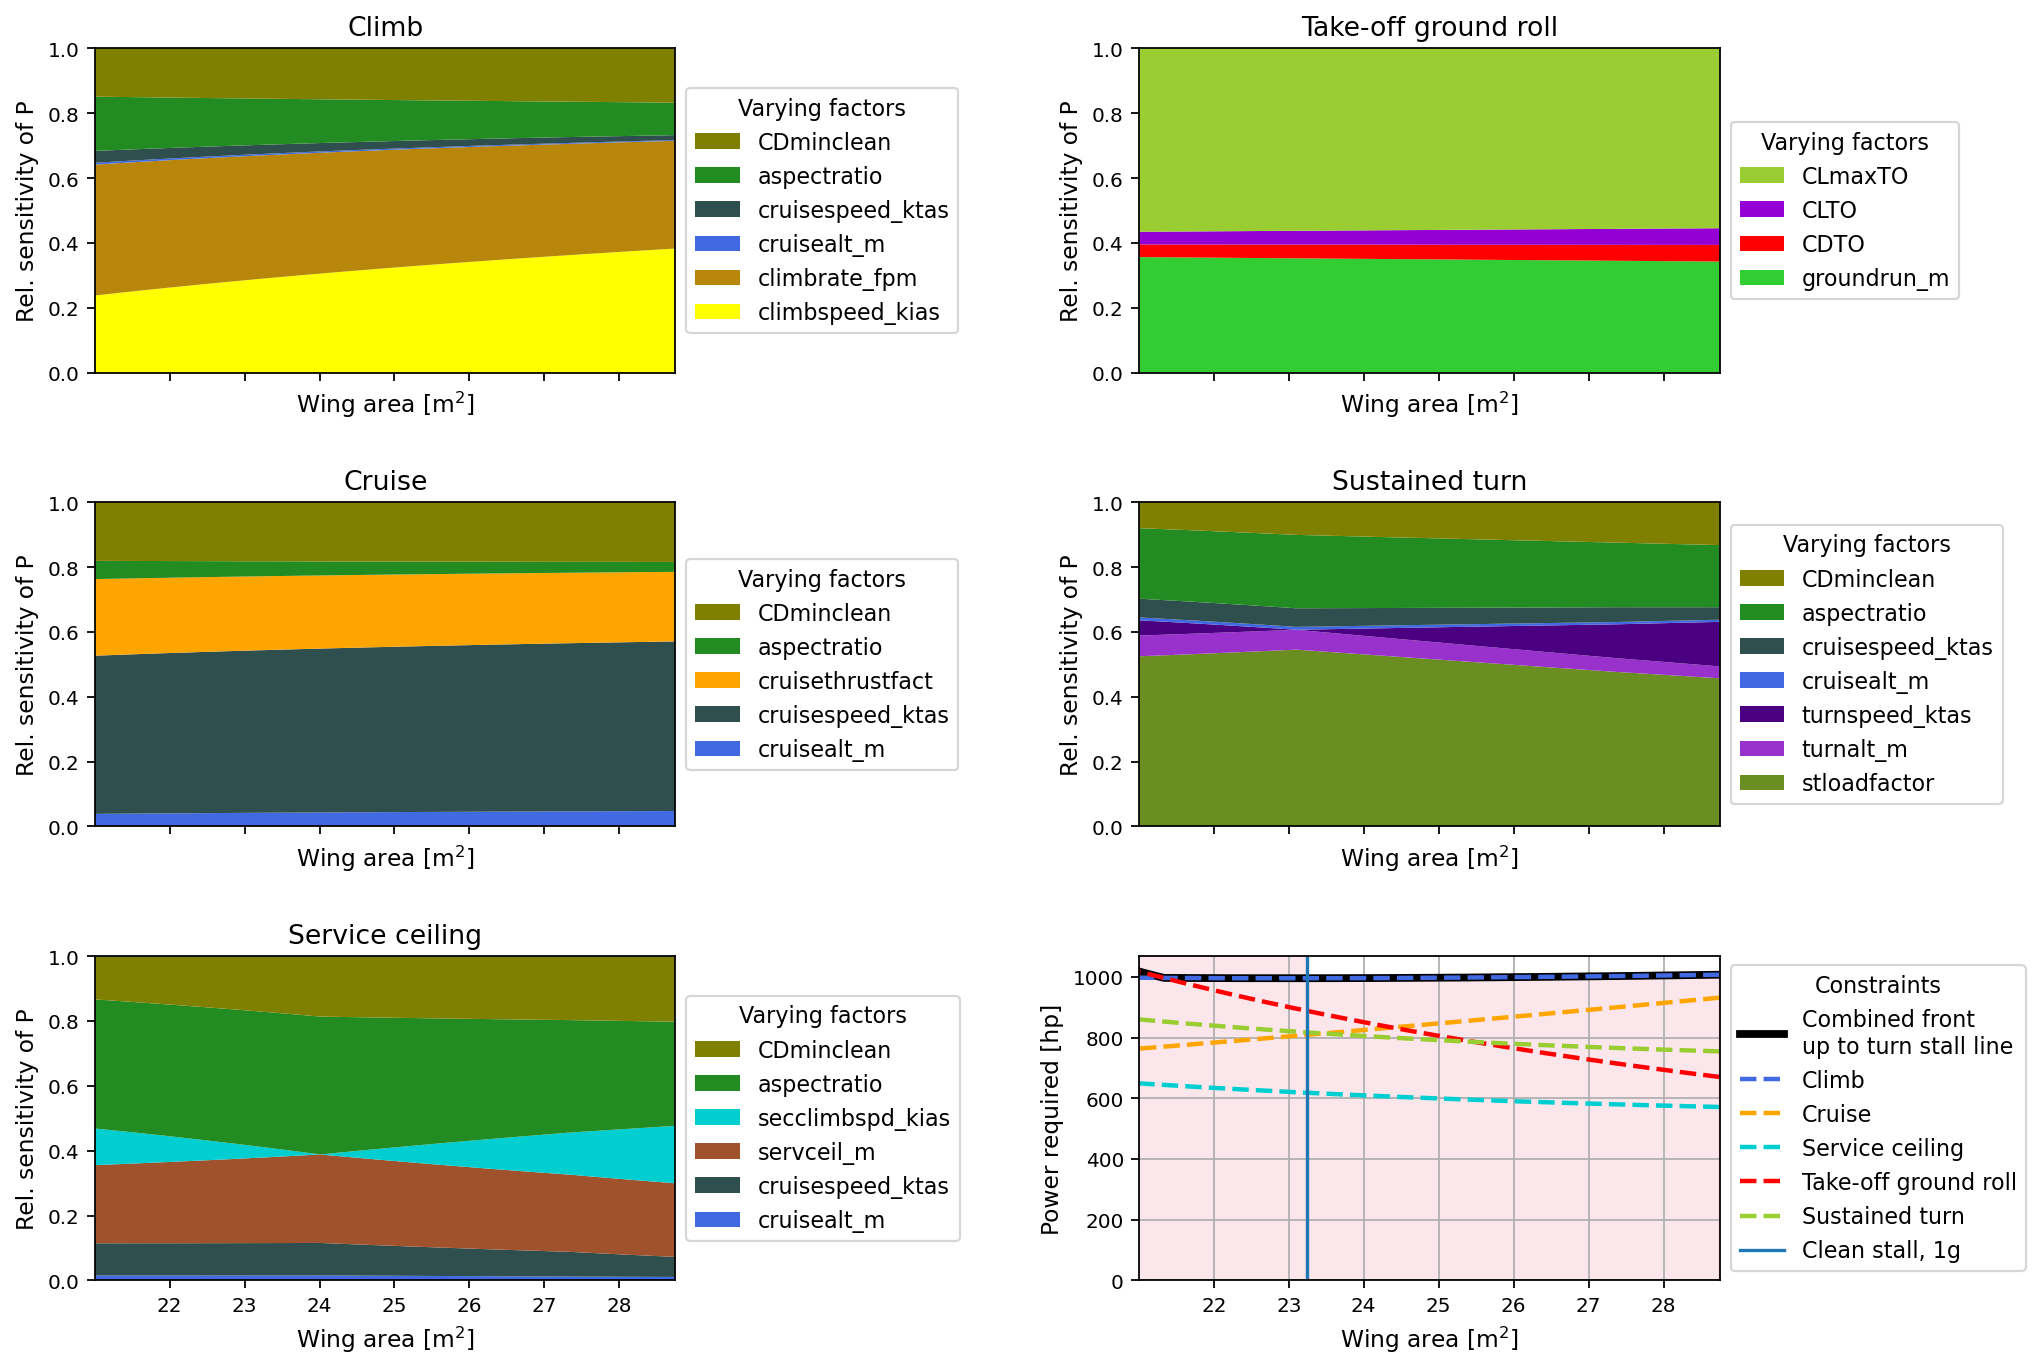

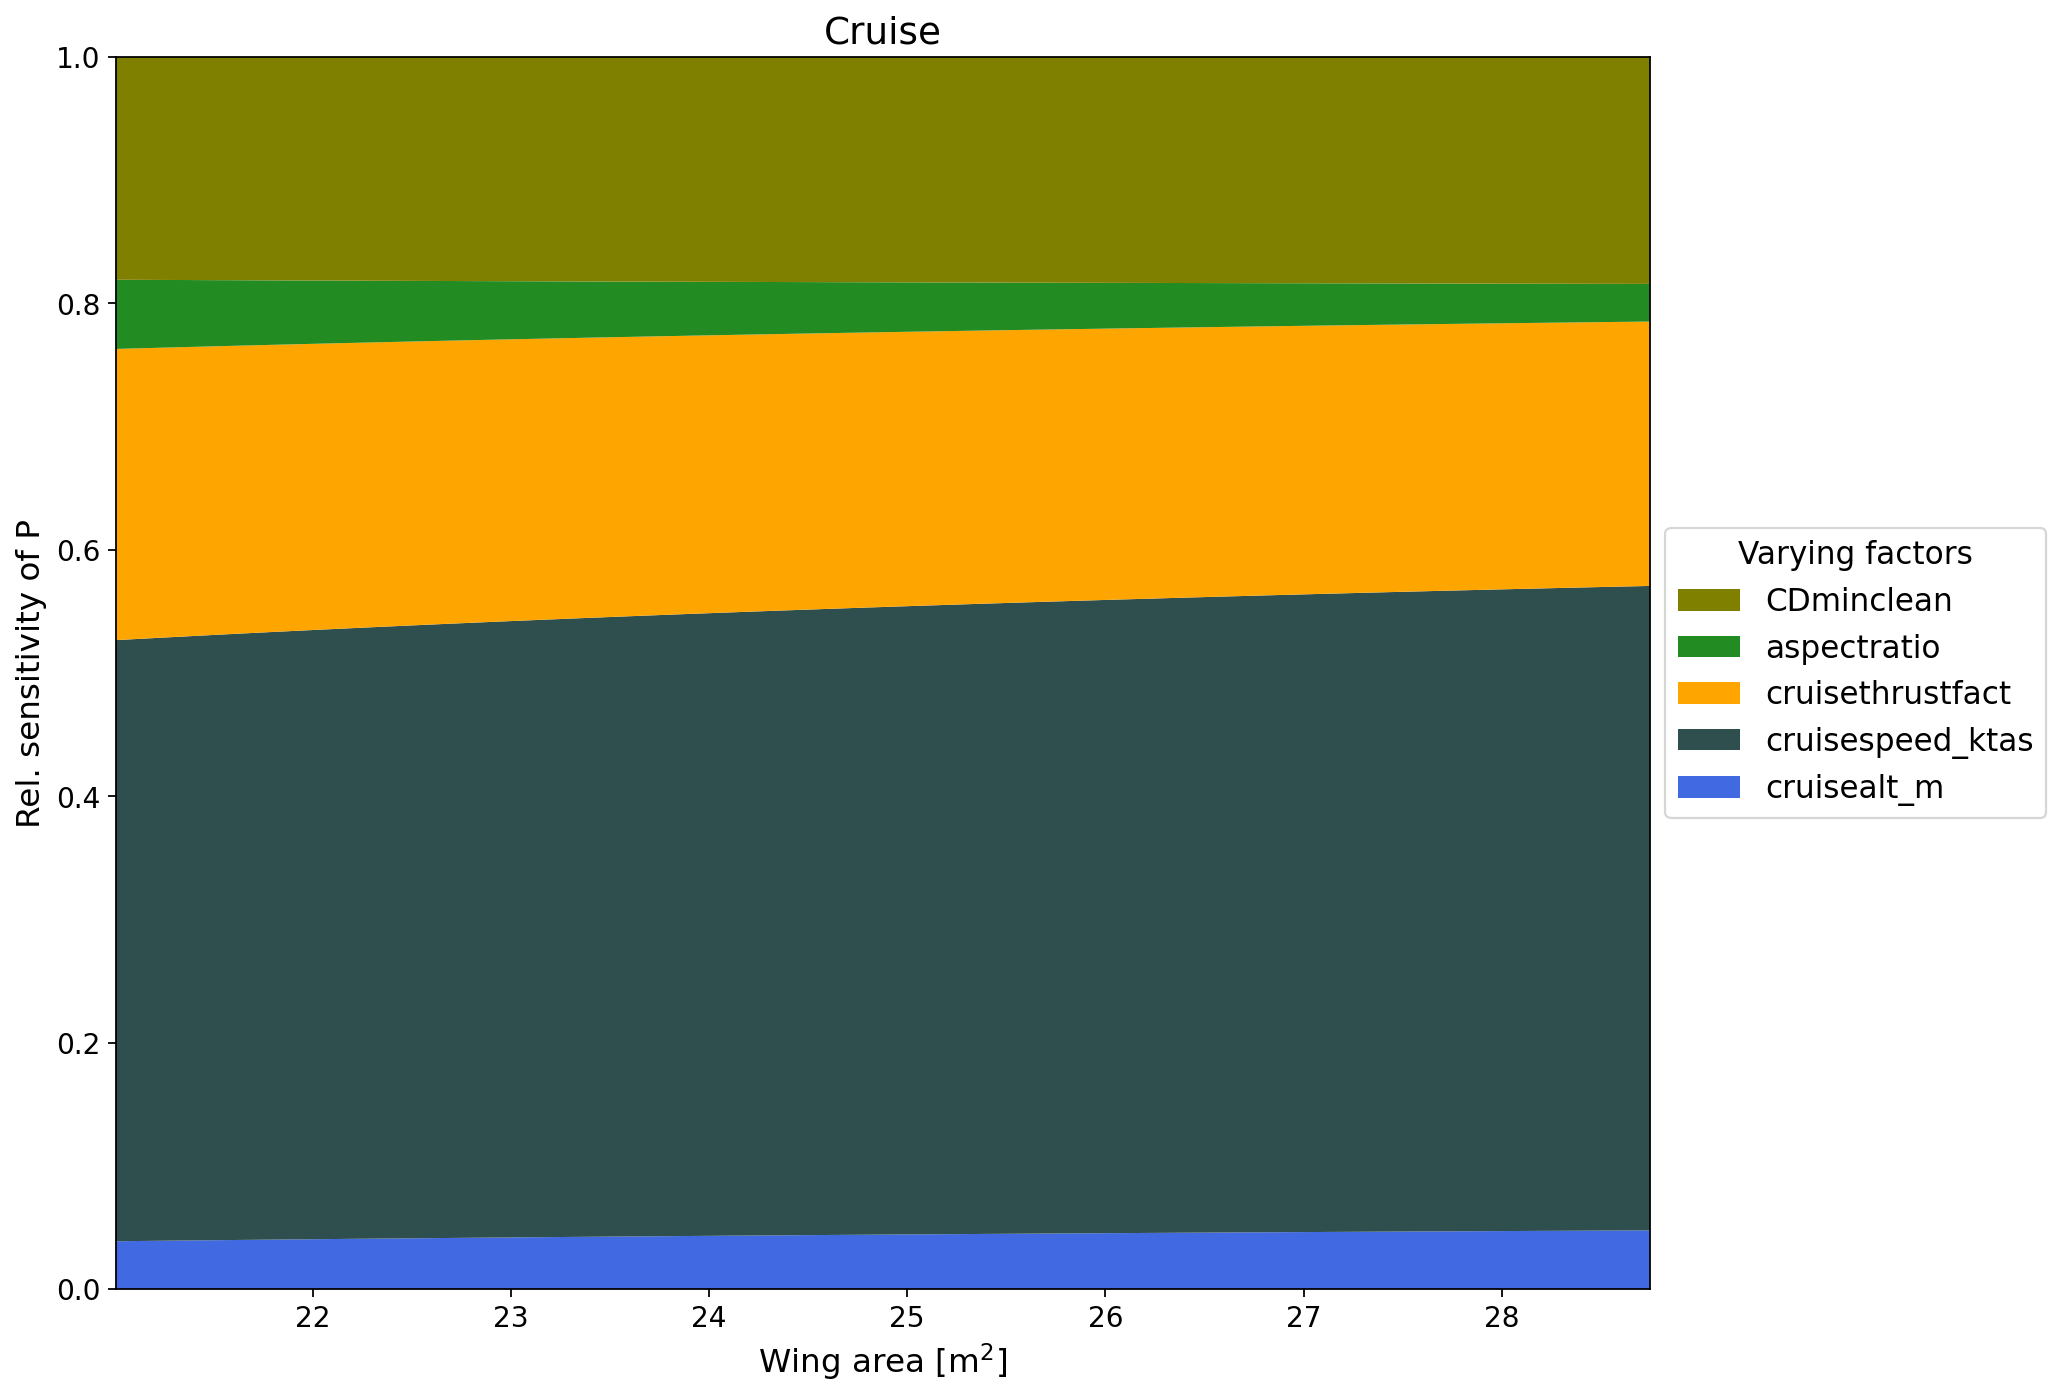

In [6]:
def _span(v, frac=0.05):
    v = float(v)
    if v <= 0.0:
        return v
    return [v * (1.0 - frac), v * (1.0 + frac)]

designbrief_sens = {
    'rwyelevation_m': float(designbrief['rwyelevation_m']),
    'groundrun_m': _span(designbrief['groundrun_m']),
    'stloadfactor': _span(designbrief['stloadfactor']),
    'turnalt_m': _span(designbrief['turnalt_m']),
    'turnspeed_ktas': _span(designbrief['turnspeed_ktas']),
    'climbalt_m': float(designbrief['climbalt_m']),
    'climbspeed_kias': _span(designbrief['climbspeed_kias']),
    'climbrate_fpm': _span(designbrief['climbrate_fpm']),
    'cruisealt_m': _span(designbrief['cruisealt_m']),
    'cruisespeed_ktas': _span(designbrief['cruisespeed_ktas']),
    'cruisethrustfact': _span(designbrief['cruisethrustfact']),
    'servceil_m': _span(designbrief['servceil_m']),
    'secclimbspd_kias': _span(designbrief['secclimbspd_kias']),
    'vstallclean_kcas': _span(designbrief['vstallclean_kcas']),
}

designdefinition_sens = {
    'aspectratio': _span(designdefinition['aspectratio']),
    'sweep_le_deg': designdefinition['sweep_le_deg'],
    'sweep_mt_deg': designdefinition['sweep_mt_deg'],
    'weightfractions': designdefinition['weightfractions'],
    'weight_n': co.kg2n(TOW_kg),
}

designperformance_sens = {
    'CDTO': _span(designperformance['CDTO']),
    'CLTO': _span(designperformance['CLTO']),
    'CLmaxTO': _span(designperformance['CLmaxTO']),
    'CLmaxclean': _span(designperformance['CLmaxclean']),
    'mu_R': designperformance['mu_R'],
    'CDminclean': _span(designperformance['CDminclean']),
    'etaprop': {
        # Keep etaprop scalar for ADRpy compatibility in electric cases.
        'take-off': designperformance['etaprop']['take-off'],
        'climb': designperformance['etaprop']['climb'],
        'cruise': designperformance['etaprop']['cruise'],
        'turn': designperformance['etaprop']['turn'],
        'servceil': designperformance['etaprop']['servceil'],
    },
}

concept_sens = ca.AircraftConcept(
    designbrief_sens,
    designdefinition_sens,
    designperformance_sens,
    designatm,
    designpropulsion,
)

concept_sens.propulsionsensitivity_monothetic(
    wingloading_pa=wslist_pa,
    show=True,
    y_var='p_hp',
    x_var='s_m2',
)

concept_sens.propulsionsensitivity_monothetic(
    wingloading_pa=wslist_pa,
    show='cruise',
    y_var='p_hp',
    x_var='s_m2',
    maskbool=False,
)
